# Building EO training/validation/testing datasets with the Sentinelhub API

#### The following modules/Libraries will be needed

In [2]:
from sentinelhub import BBox, CRS, DataCollection, SHConfig, WmsRequest, WcsRequest, DataSource, MimeType
import numpy as np
from datetime import date, timedelta
import matplotlib.pyplot as plt
from scipy.ndimage.filters import uniform_filter
from scipy.ndimage.measurements import variance
import rasterio
import numpy as np
import datetime

### Prerequisites

#### Sentinel Hub account

In order to use Sentinel Hub services you will need a Sentinel Hub account. If you do not have one yet, you can create a free trial account at [Sentinel Hub webpage](https://services.sentinel-hub.com/oauth/subscription). If you are a researcher you can even apply for a free non-commercial account at [ESA OSEO page](https://earth.esa.int/aos/OSEO).

Once you have the account set up, login to [Sentinel Hub Configurator](https://apps.sentinel-hub.com/configurator/). Inside there will already exist one configuration with an **instance ID** (alpha-numeric code of length 36). For this tutorial it is recommended that you create a new configuration (`"Add new configuration"`) and set the configuration to be based on **Python scripts template**. Such configuration will already contain all layers used in these examples. Otherwise you will have to define the layers for your  configuration yourself.

After you have decided which configuration to use, you have two options. You can either put configuration's **instance ID** into `sentinelhub` package's configuration file following the [configuration instructions](http://sentinelhub-py.readthedocs.io/en/latest/configure.html) or you can write it down in the following cell:

Generate a configuration:
This is done using the ID.
This is so that sentinelhub knows you are authorised to use their service, and which parts of the service you want to use.

In [3]:
INSTANCE_ID = '42345776-19b9-4c80-970d-893dea504aad'
if INSTANCE_ID:
    config = SHConfig()
    config.instance_id = INSTANCE_ID
else:
    config = None

print(config)

{
  "instance_id": "42345776-19b9-4c80-970d-893dea504aad",
  "sh_client_id": "",
  "sh_client_secret": "",
  "sh_base_url": "https://services.sentinel-hub.com",
  "geopedia_wms_url": "https://service.geopedia.world",
  "geopedia_rest_url": "https://www.geopedia.world/rest",
  "aws_access_key_id": "",
  "aws_secret_access_key": "",
  "aws_metadata_url": "https://roda.sentinel-hub.com",
  "aws_s3_l1c_bucket": "sentinel-s2-l1c",
  "aws_s3_l2a_bucket": "sentinel-s2-l2a",
  "opensearch_url": "http://opensearch.sentinel-hub.com/resto/api/collections/Sentinel2",
  "max_wfs_records_per_query": 100,
  "max_opensearch_records_per_query": 500,
  "max_download_attempts": 4,
  "download_sleep_time": 5,
  "download_timeout_seconds": 120,
  "number_of_download_processes": 1
}


Define a region and a random test date 

time_from 2016-05-01
time_to 2016-10-30
Returned data is of type = <class 'list'> and length 1.


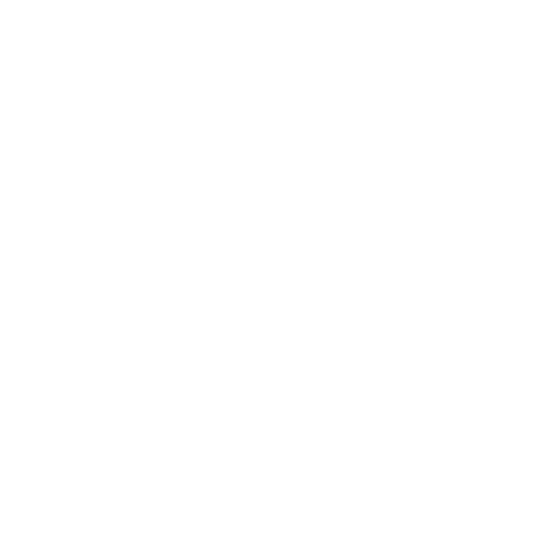

Returned data is of type = <class 'list'> and length 1.


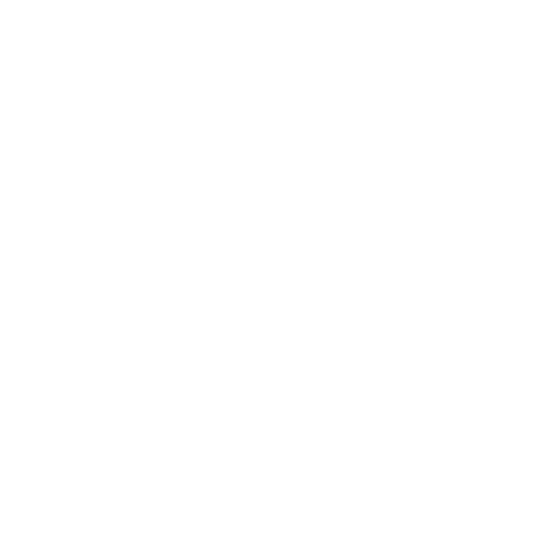

Returned data is of type = <class 'list'> and length 0.
Returned data is of type = <class 'list'> and length 1.


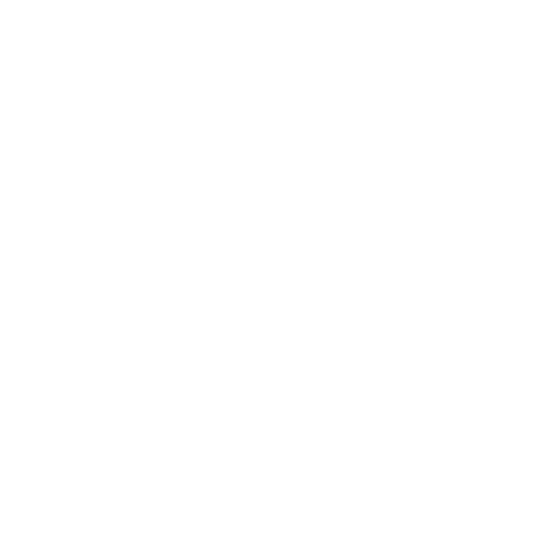

Returned data is of type = <class 'list'> and length 1.


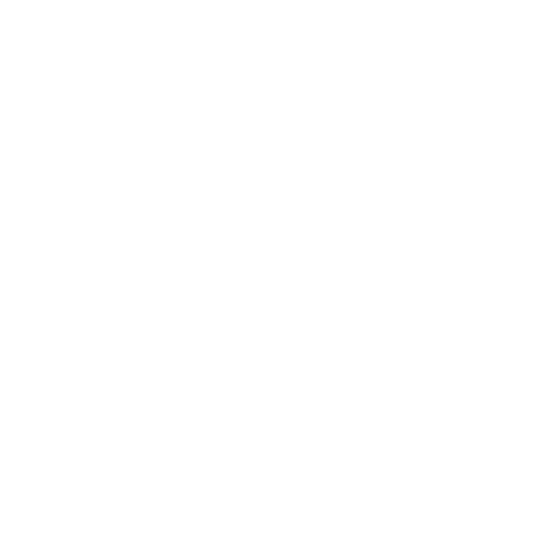

Returned data is of type = <class 'list'> and length 0.
time_from 2017-05-01
time_to 2017-10-30
Returned data is of type = <class 'list'> and length 1.


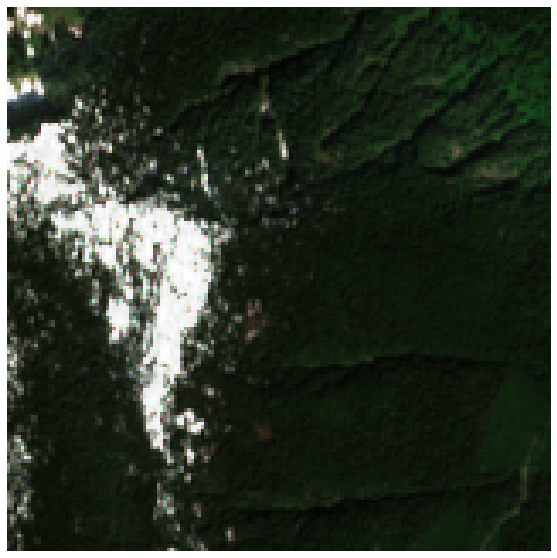

Returned data is of type = <class 'list'> and length 1.


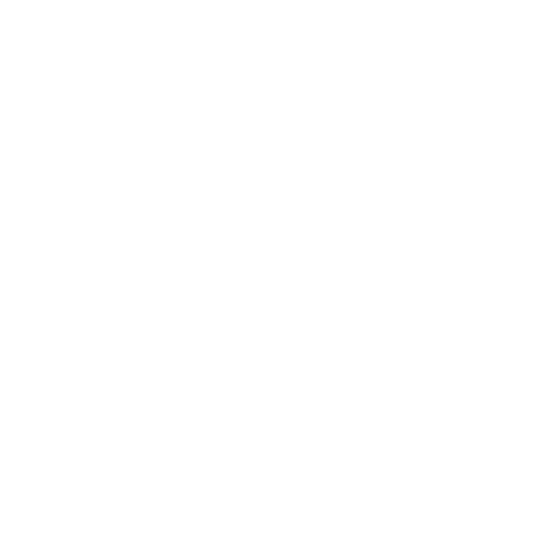

Returned data is of type = <class 'list'> and length 1.


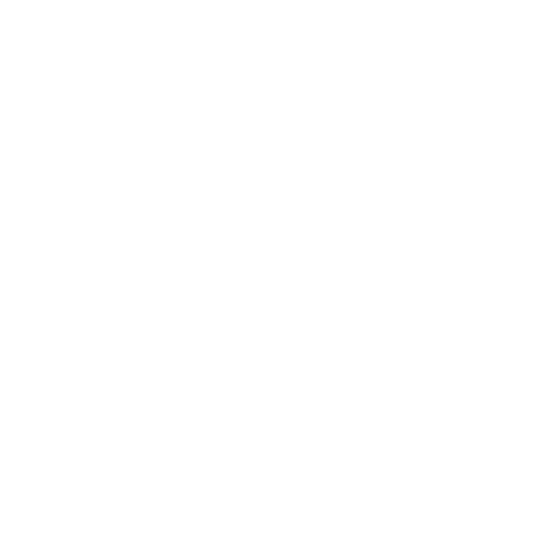

Returned data is of type = <class 'list'> and length 1.


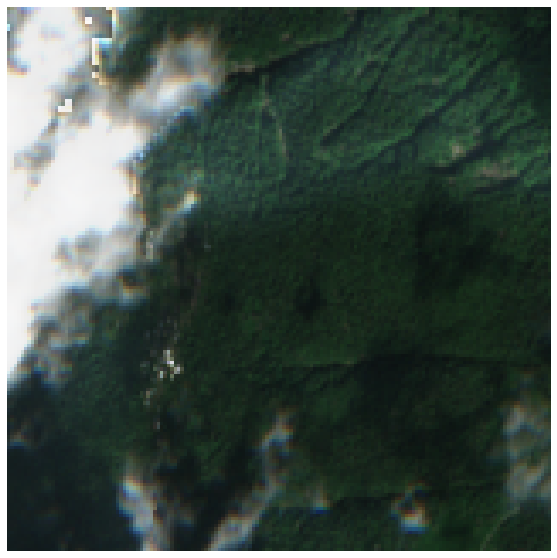

Returned data is of type = <class 'list'> and length 1.


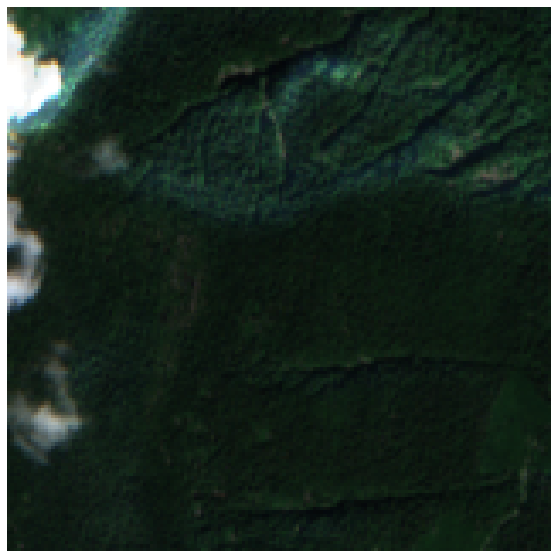

Returned data is of type = <class 'list'> and length 1.


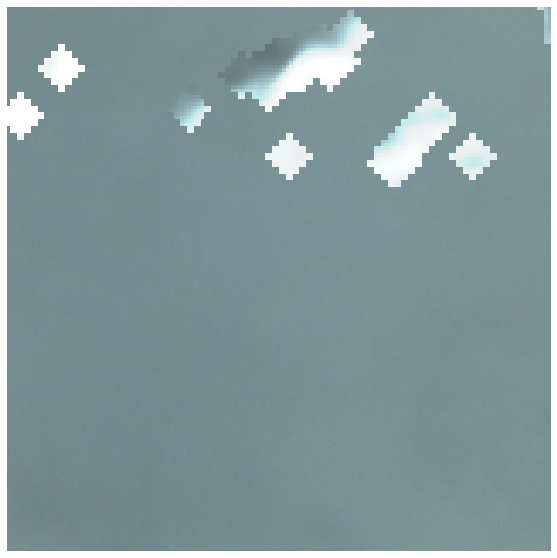

Returned data is of type = <class 'list'> and length 0.
Returned data is of type = <class 'list'> and length 0.
Returned data is of type = <class 'list'> and length 1.


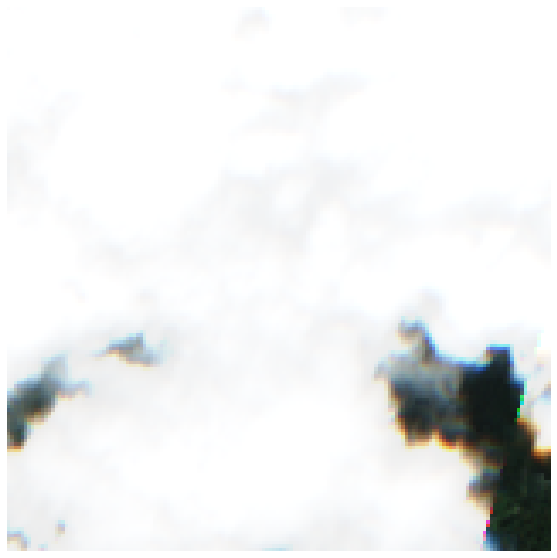

Returned data is of type = <class 'list'> and length 1.


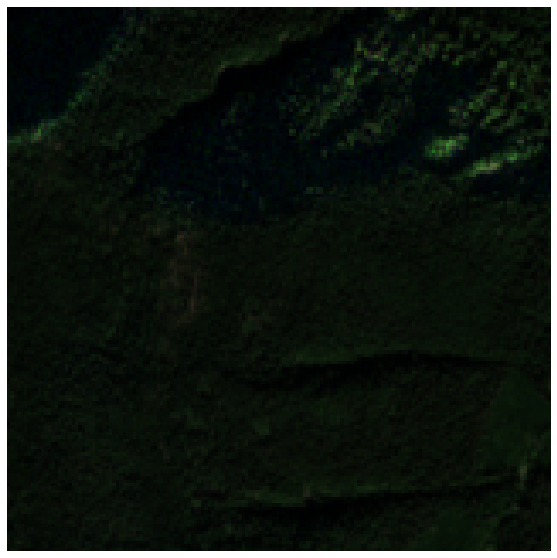

Returned data is of type = <class 'list'> and length 1.


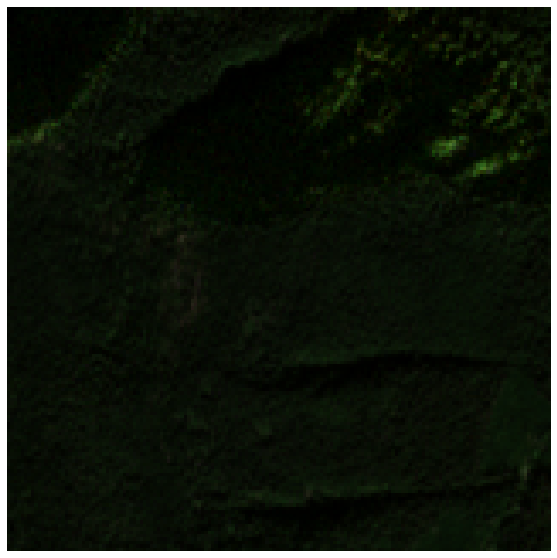

Returned data is of type = <class 'list'> and length 1.


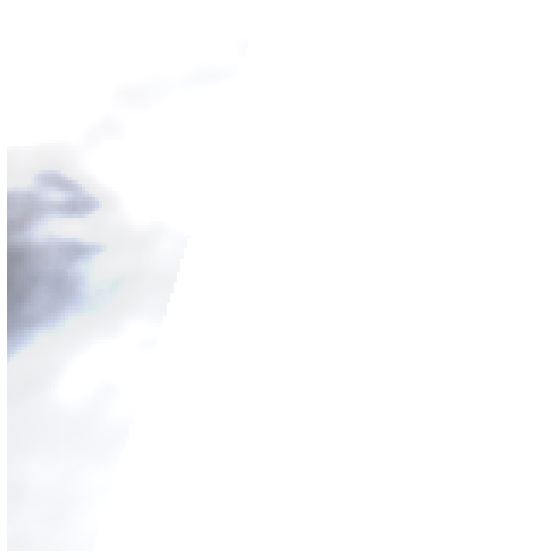

time_from 2018-05-01
time_to 2018-10-30
Returned data is of type = <class 'list'> and length 0.
Returned data is of type = <class 'list'> and length 0.
Returned data is of type = <class 'list'> and length 0.
Returned data is of type = <class 'list'> and length 1.


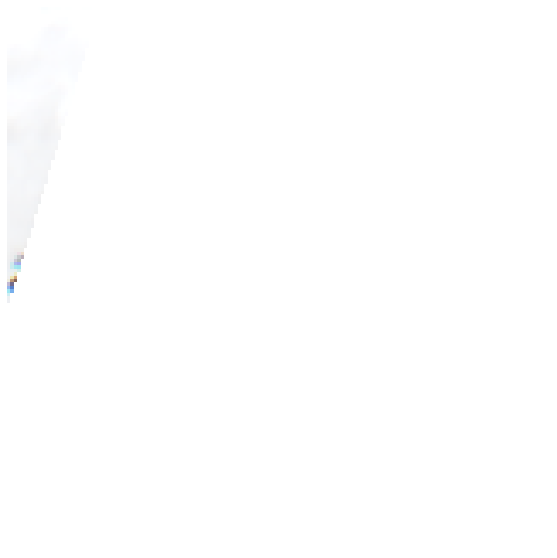

Returned data is of type = <class 'list'> and length 1.


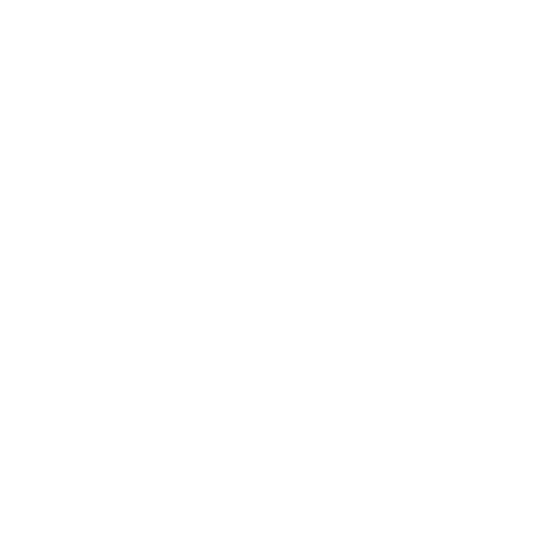

Returned data is of type = <class 'list'> and length 1.


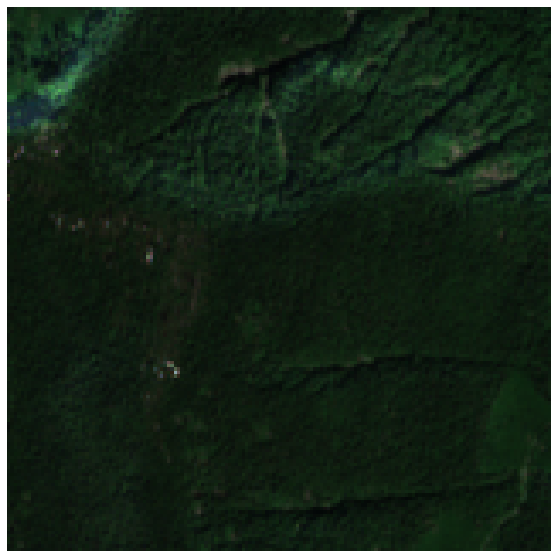

Returned data is of type = <class 'list'> and length 1.


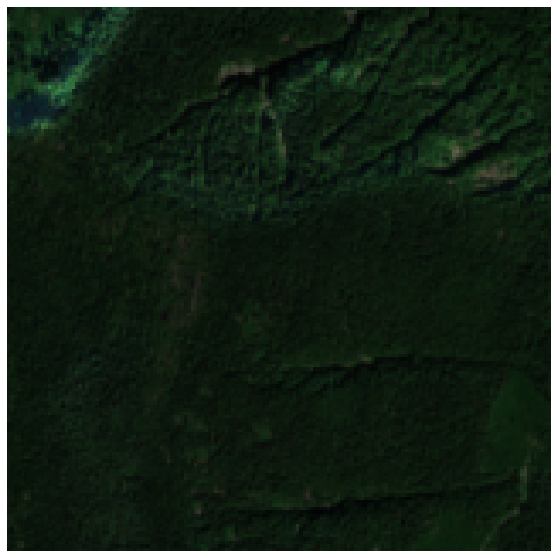

Returned data is of type = <class 'list'> and length 0.
Returned data is of type = <class 'list'> and length 1.


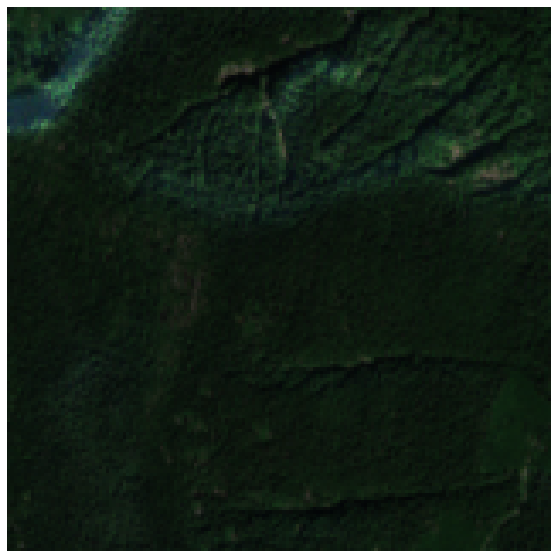

Returned data is of type = <class 'list'> and length 1.


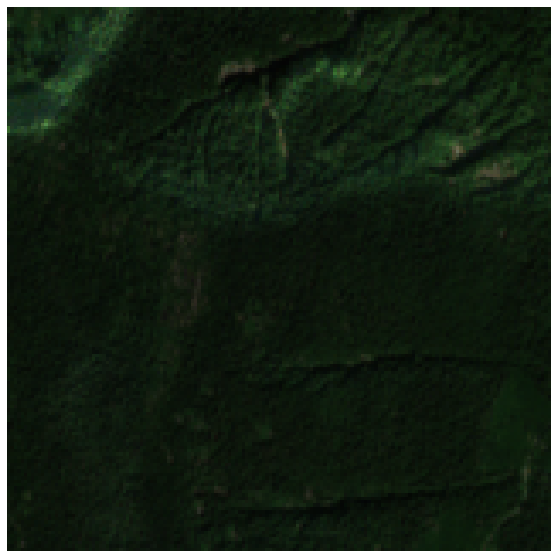

Returned data is of type = <class 'list'> and length 1.


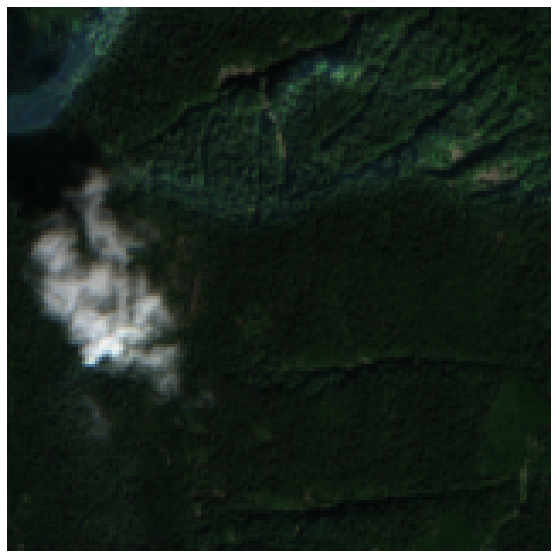

Returned data is of type = <class 'list'> and length 1.


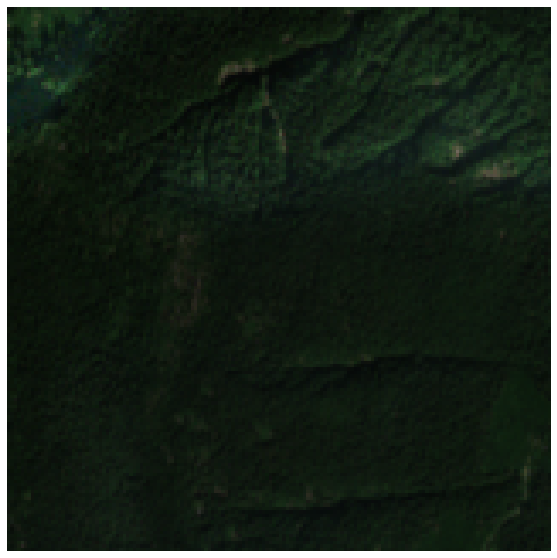

Returned data is of type = <class 'list'> and length 1.


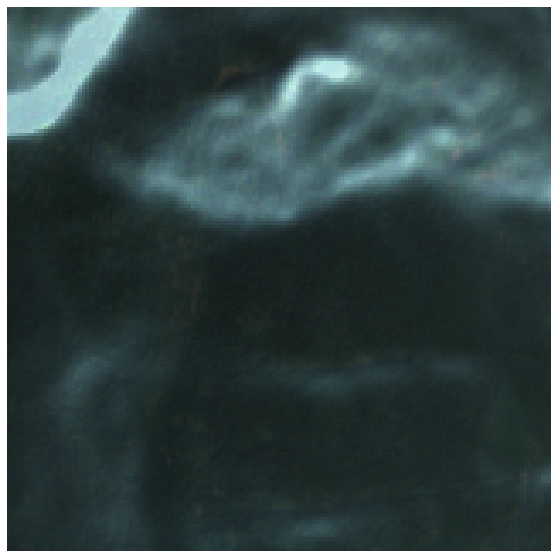

Returned data is of type = <class 'list'> and length 1.


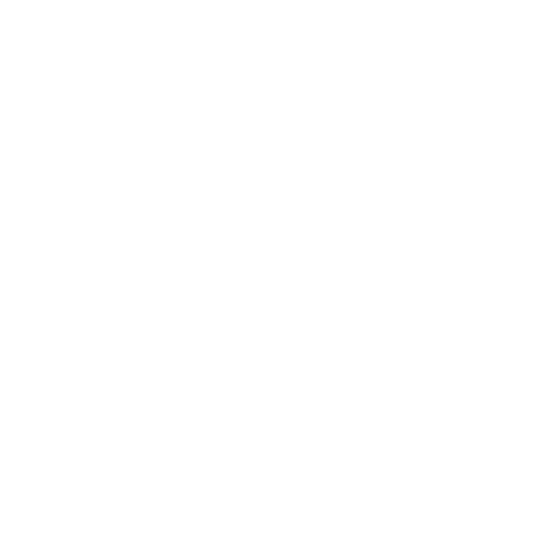

Returned data is of type = <class 'list'> and length 1.


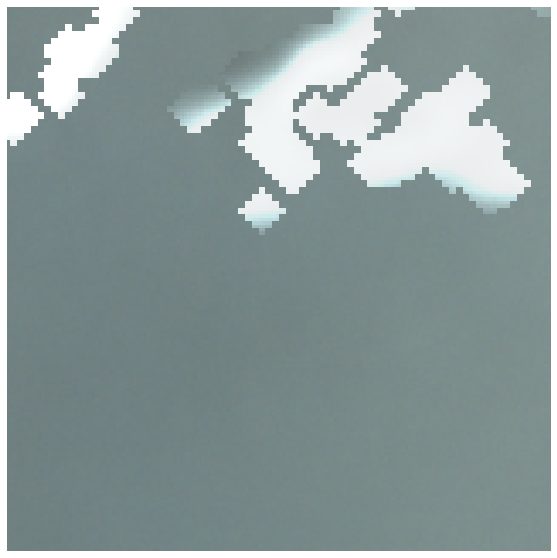

Returned data is of type = <class 'list'> and length 1.


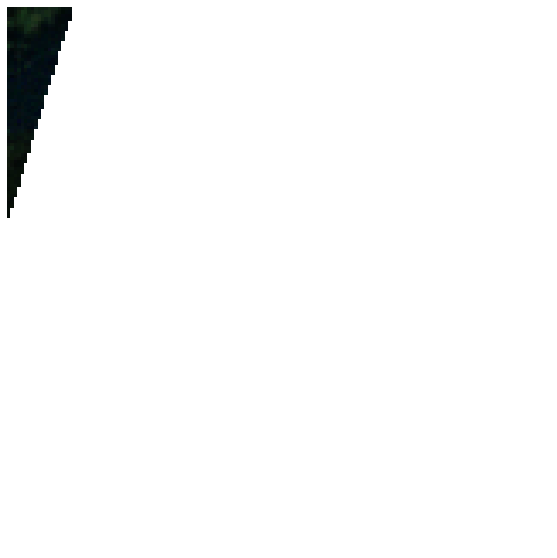

Returned data is of type = <class 'list'> and length 1.


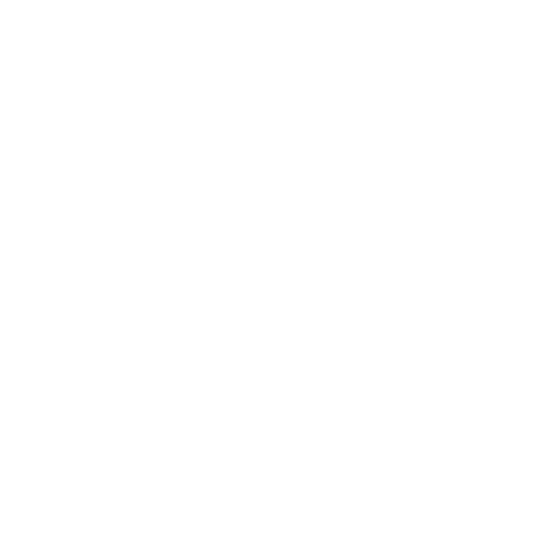

Returned data is of type = <class 'list'> and length 1.


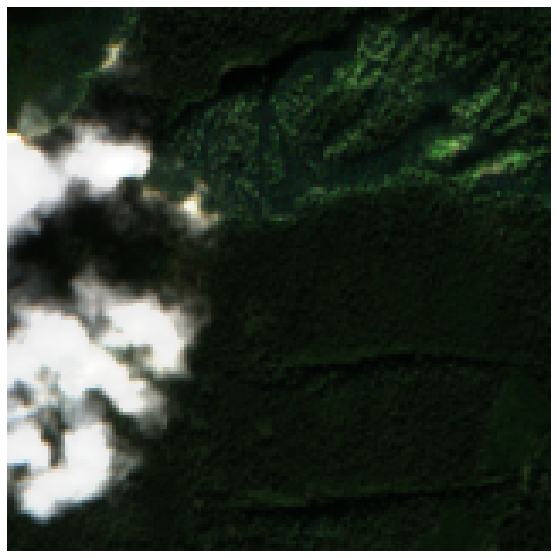

Returned data is of type = <class 'list'> and length 1.


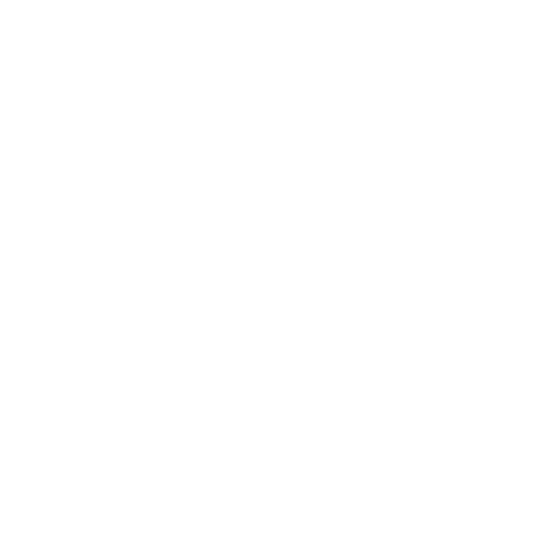

Returned data is of type = <class 'list'> and length 1.


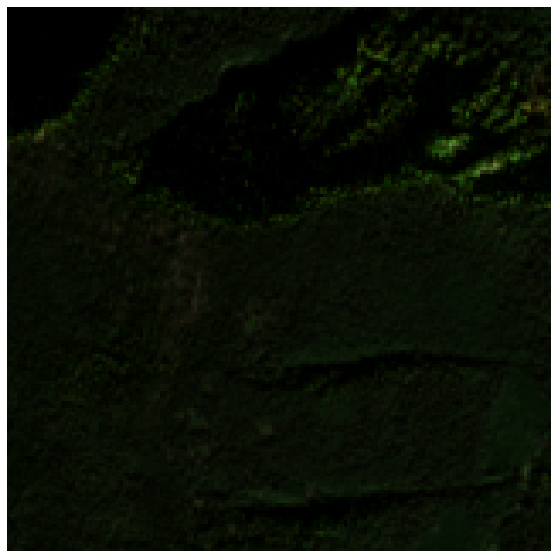

Returned data is of type = <class 'list'> and length 1.


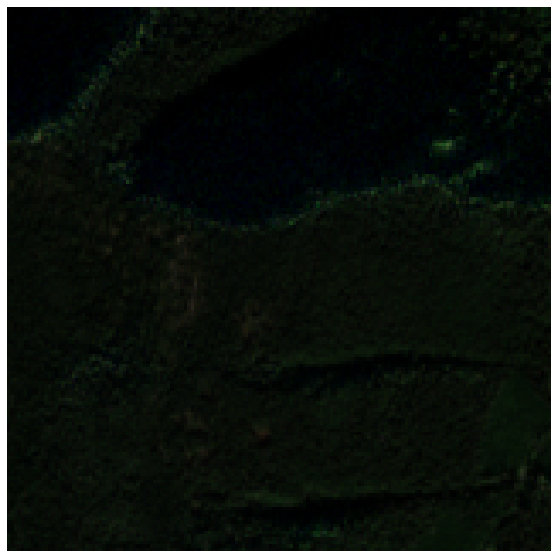

Returned data is of type = <class 'list'> and length 0.
time_from 2019-05-01
time_to 2019-10-30
Returned data is of type = <class 'list'> and length 1.


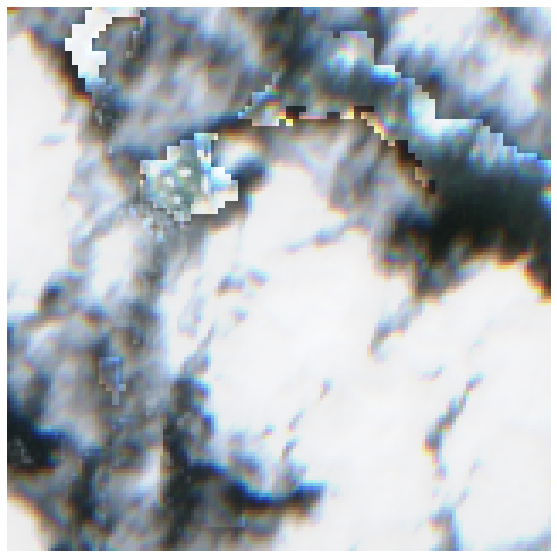

Returned data is of type = <class 'list'> and length 1.


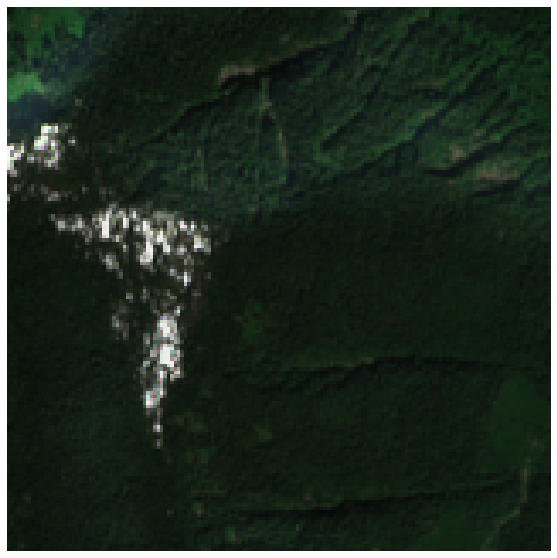

Returned data is of type = <class 'list'> and length 1.


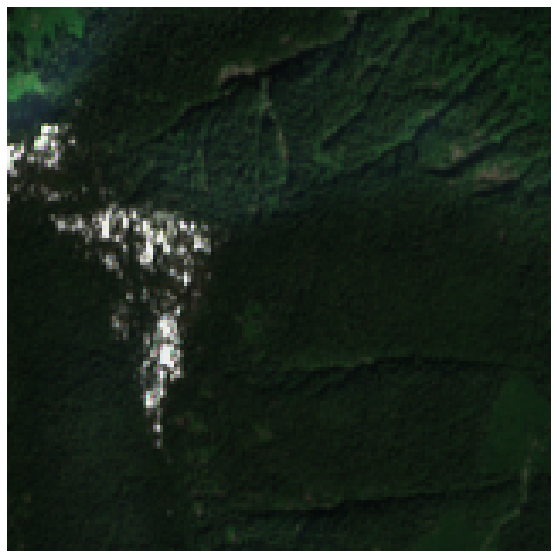

Returned data is of type = <class 'list'> and length 0.
Returned data is of type = <class 'list'> and length 1.


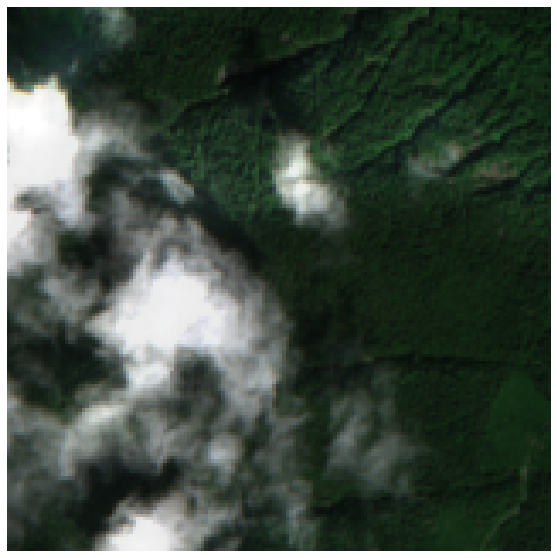

Returned data is of type = <class 'list'> and length 0.
Returned data is of type = <class 'list'> and length 0.
Returned data is of type = <class 'list'> and length 0.
Returned data is of type = <class 'list'> and length 1.


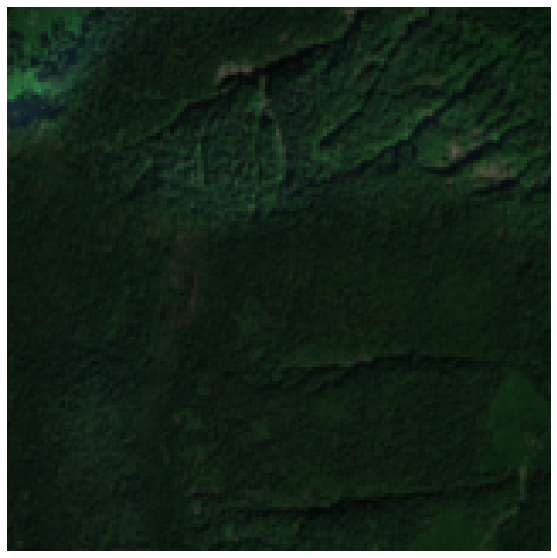

Returned data is of type = <class 'list'> and length 1.


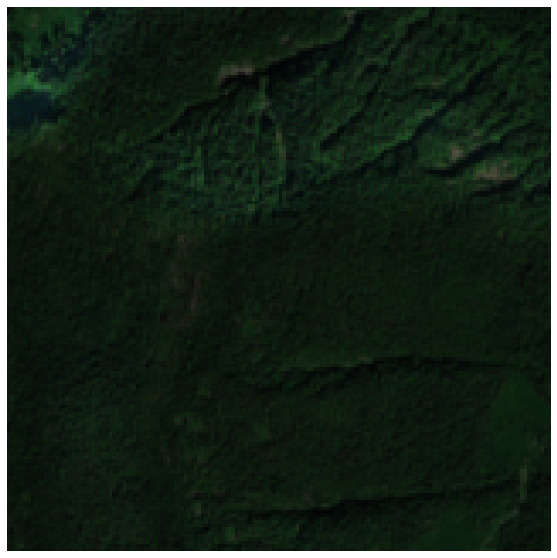

Returned data is of type = <class 'list'> and length 1.


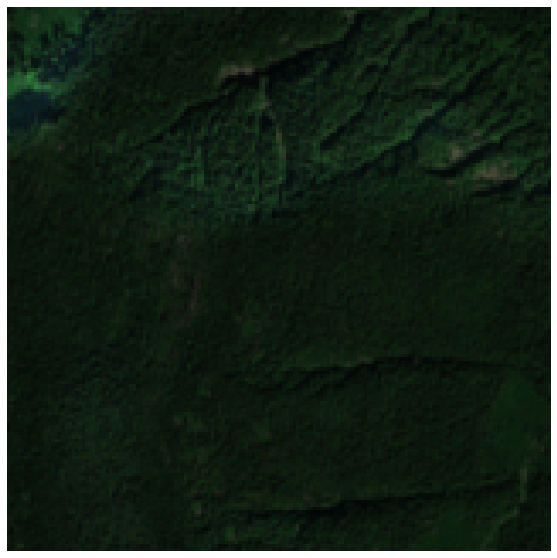

Returned data is of type = <class 'list'> and length 1.


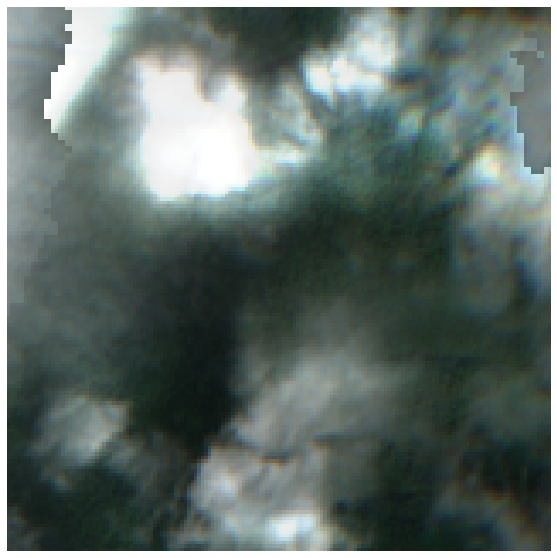

Returned data is of type = <class 'list'> and length 1.


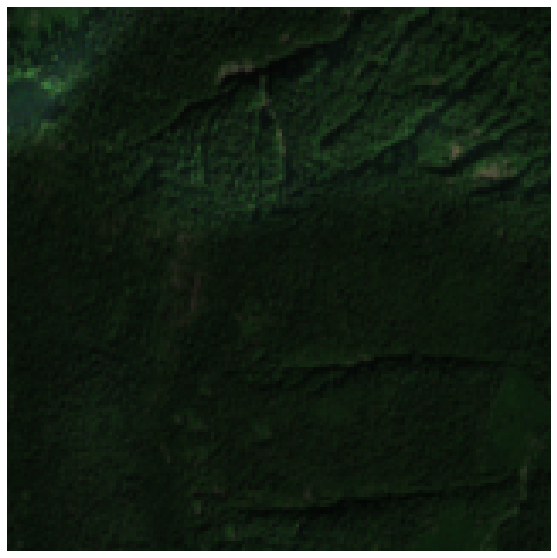

Returned data is of type = <class 'list'> and length 1.


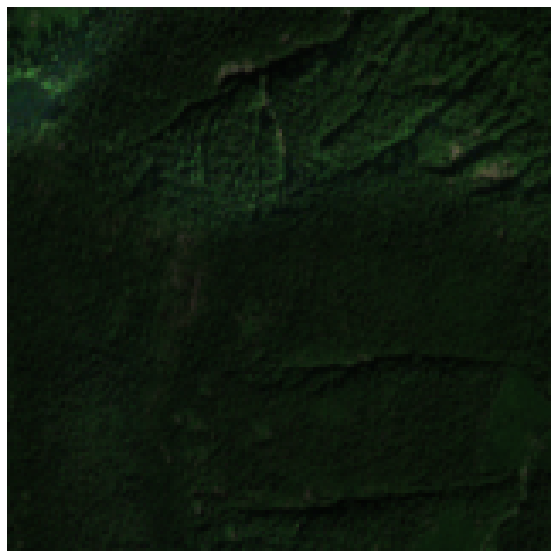

Returned data is of type = <class 'list'> and length 0.
Returned data is of type = <class 'list'> and length 0.
Returned data is of type = <class 'list'> and length 0.
Returned data is of type = <class 'list'> and length 0.
Returned data is of type = <class 'list'> and length 1.


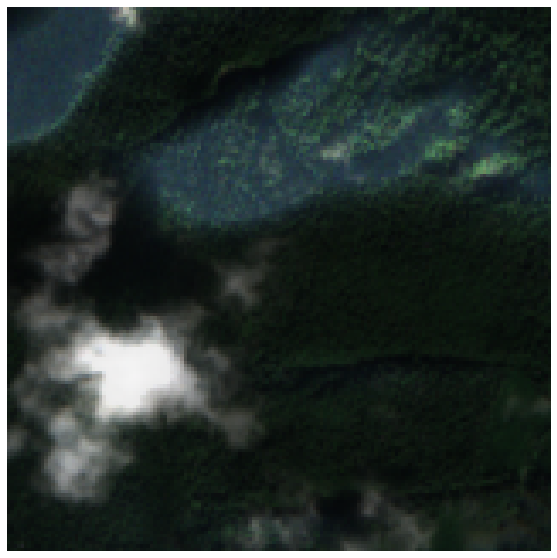

Returned data is of type = <class 'list'> and length 1.


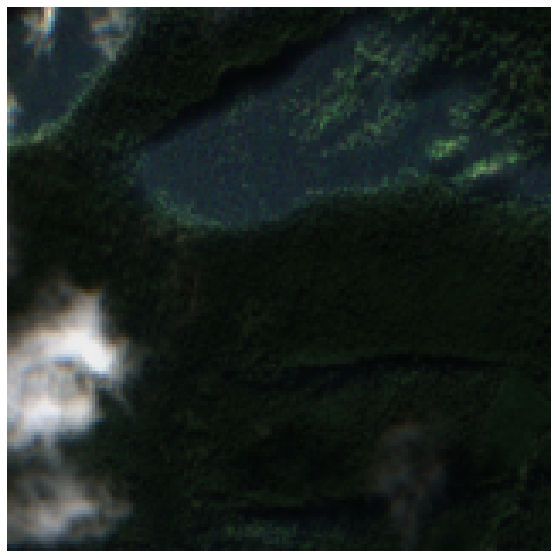

Returned data is of type = <class 'list'> and length 1.


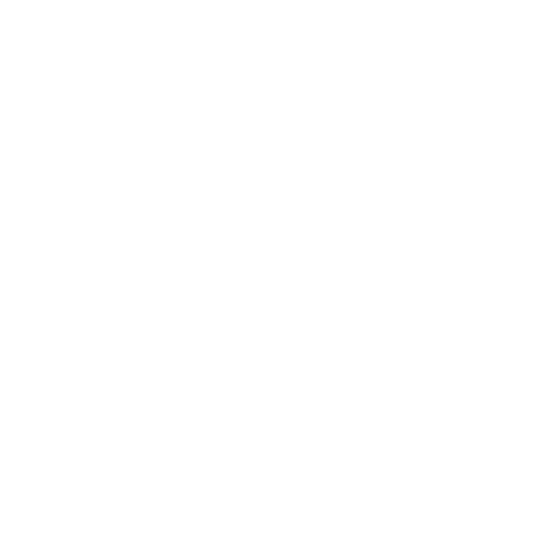

Returned data is of type = <class 'list'> and length 0.
Returned data is of type = <class 'list'> and length 1.


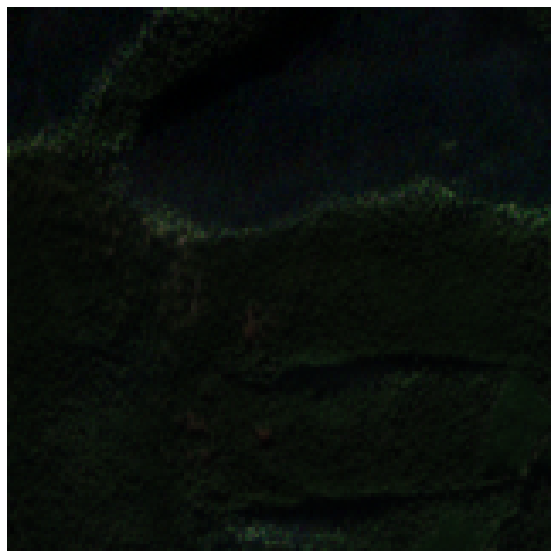

Returned data is of type = <class 'list'> and length 1.


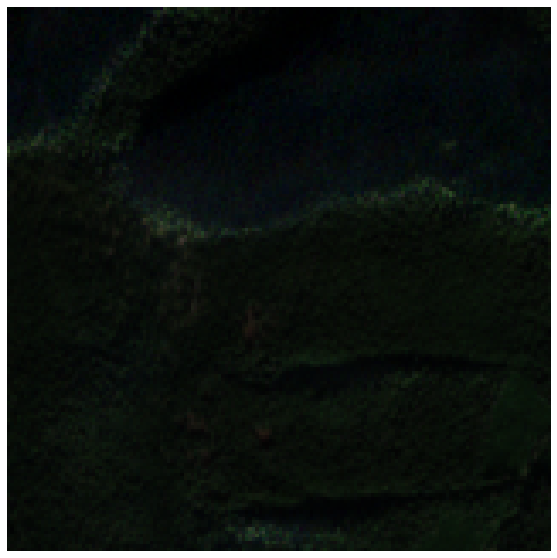

time_from 2020-05-01
time_to 2020-10-30
Returned data is of type = <class 'list'> and length 0.
Returned data is of type = <class 'list'> and length 0.
Returned data is of type = <class 'list'> and length 0.
Returned data is of type = <class 'list'> and length 0.
Returned data is of type = <class 'list'> and length 1.


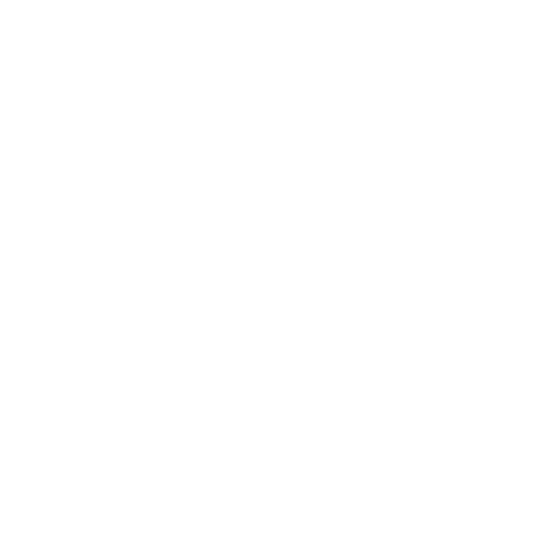

Returned data is of type = <class 'list'> and length 1.


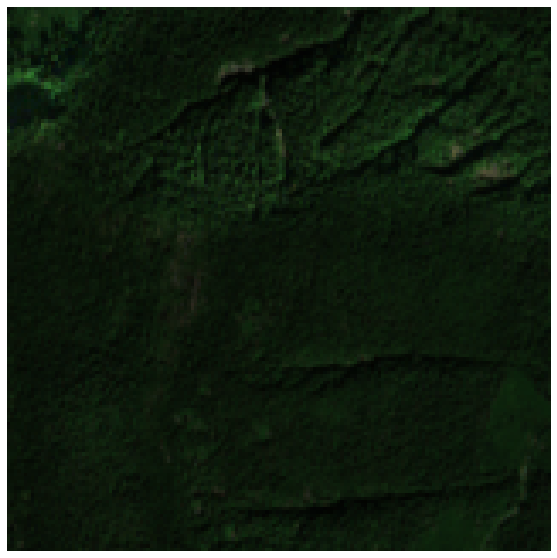

Returned data is of type = <class 'list'> and length 1.


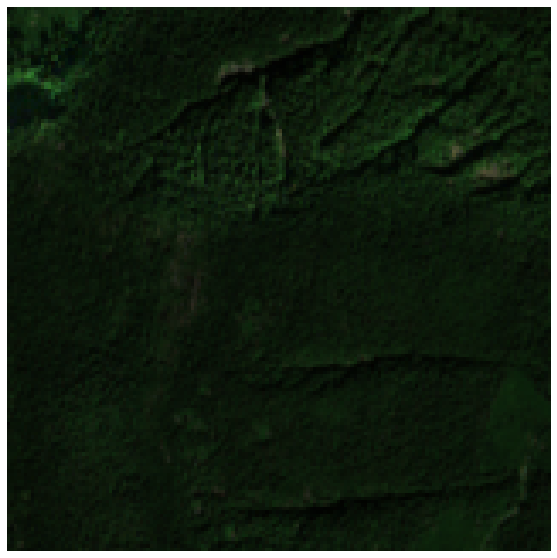

Returned data is of type = <class 'list'> and length 0.
Returned data is of type = <class 'list'> and length 1.


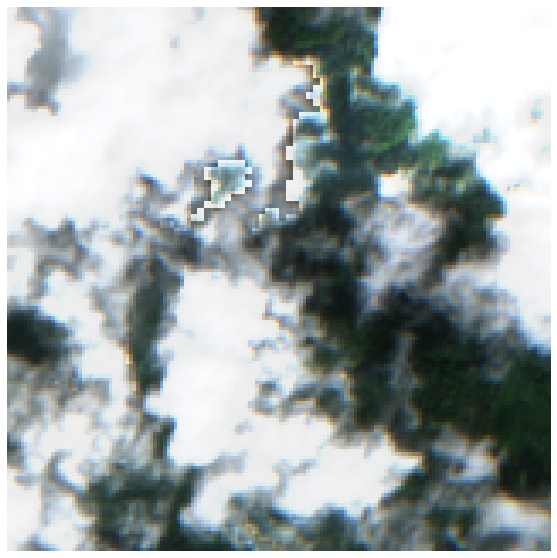

Returned data is of type = <class 'list'> and length 0.
Returned data is of type = <class 'list'> and length 1.


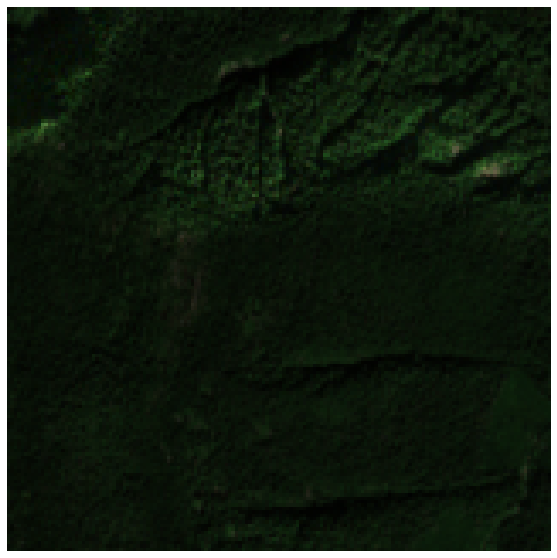

Returned data is of type = <class 'list'> and length 1.


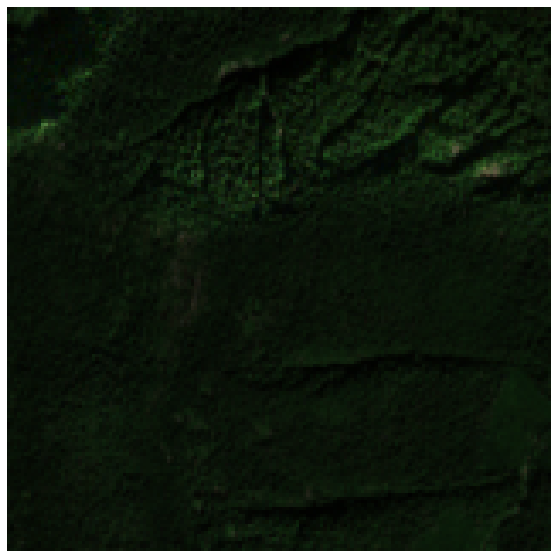

Returned data is of type = <class 'list'> and length 1.


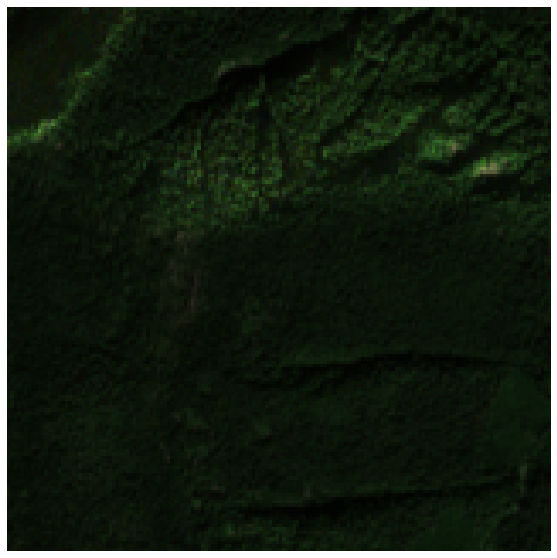

Returned data is of type = <class 'list'> and length 0.
Returned data is of type = <class 'list'> and length 0.
Returned data is of type = <class 'list'> and length 0.
Returned data is of type = <class 'list'> and length 1.


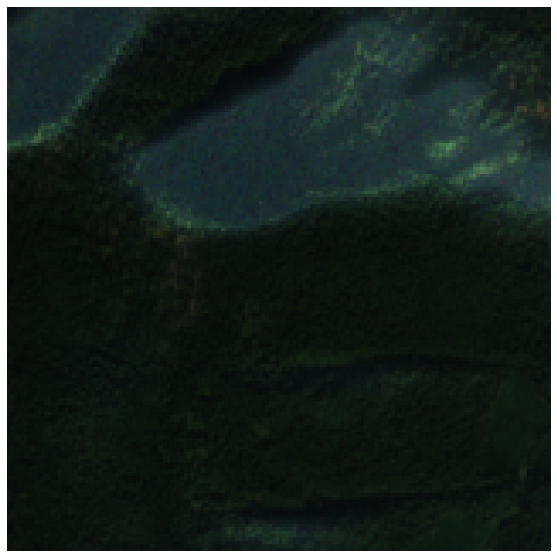

Returned data is of type = <class 'list'> and length 1.


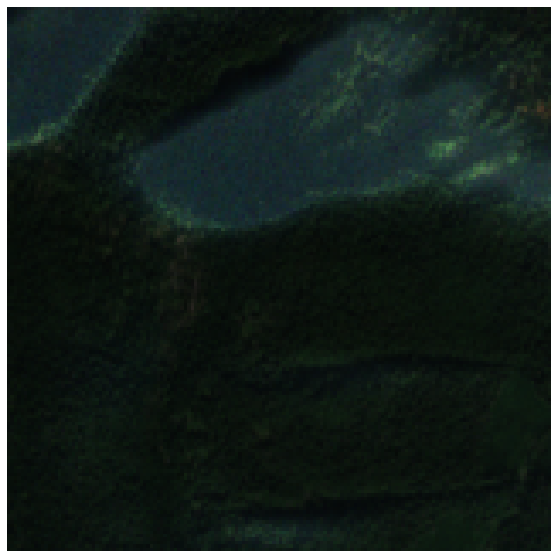

Returned data is of type = <class 'list'> and length 0.
Returned data is of type = <class 'list'> and length 0.
time_from 2015-05-01
time_to 2015-10-30
Returned data is of type = <class 'list'> and length 1.


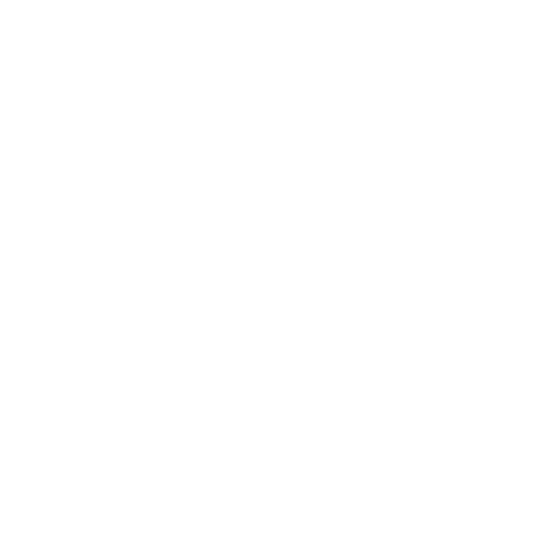

In [86]:
class SentinelData:
    """
    Retreiveing Sentinel data from Sentinel Hub
    initialise class with coordinates list
    """
    def __init__(self, coords_list):
        self.coords_list = coords_list
        self.resolution = '10m'
        self.area_coords = BBox(bbox=self.coords_list, crs=CRS.WGS84)
        self.year_range = {2015, 2016, 2017, 2018, 2019, 2020} # make a set of years to iterate over 
        
        
    def get_data(self):
        """ 
        Create a bounding box and assign CRS. 
        Create a wcs data request from Sentinel for Sentinel-2 data. 
        Define max clouds as 20%
        """
        for year in self.year_range:
            time_from = "{}-05-01".format(year)
            print("time_from", time_from)
            time_to = "{}-10-30".format(year)
            print("time_to", time_to)
            # make the request for the desired date range 
            wcs_true_color_request = WcsRequest (
                data_collection=DataCollection.SENTINEL2_L1C,
                layer='TRUE-COLOR-S2-L2A', # Layer you have configured
                bbox=self.area_coords,
                time= (time_from, time_to),
                resx=self.resolution, # Stick to 10m resolution as this the maximum possible 
                resy=self.resolution, 
                config=config,
                maxcc=0.2 # You can define the maximum ammount of cloud coverage you want to allow. 
            )

            # use get_dates() func to get available Sentinel data
            available_dates_list = wcs_true_color_request.get_dates()
            yield from available_dates_list


    def get_available_data(self):
        """
        Use get_data() function from Sentinel to retrieve available data for the dates.
        """
        available_dates_list = self.get_data()
        for date in available_dates_list:
            wcs_true_color_request = WcsRequest(
                data_collection=DataCollection.SENTINEL2_L1C,
                layer='TRUE-COLOR-S2-L2A', # Layer you have configured
                bbox=self.area_coords, 
                time= date,
                resx='10m', # Stick to 10m resolution as this the maximum possible 
                resy=self.resolution, 
                config=config,
                maxcc=0.1 # You can define the maximum ammount of cloud coverage you want to allow. 
            )
            basemap = wcs_true_color_request.get_data()
            print('Returned data is of type = %s and length %d.' % (type(basemap), len(basemap)))
            plot_basemap = self.plot_data(basemap)

            
    
    def plot_data(self, basemap):   
        """
        Plot the satellite data to check there is suitable cloud cover etc
        """
        for sat_img in basemap:
            fig, ax = plt.subplots(1, 1, figsize=(10,10))
            plt.imshow(sat_img)
            plt.axis('off')
            plt.show() 
            
            
    
    def web_req_data(self):
        """
        Define the web map server request
        Make the request for the desired date range
        """   
        available_dates_list = self.get_data()
        for d in available_dates_list:
            # make the request for the desired date range 
            # Define the Web map server request 
            wms_bands_request = WmsRequest(
                data_collection=DataCollection.SENTINEL2_L1C,
                layer='BANDS-S2-L2A', # We are using the 'BANDS-S2-L2A layer now'
                bbox=self.area_coords, 
                time=d,
                width=basemap.shape[1], # 10m resolution dims are sourced from the basemap. 
                height=basemap.shape[0],
                image_format=MimeType.TIFF, 
                config=config
            ) 
            # Extract the bands.
            bands = wms_bands_request.get_data()[-1]
            bands = bands.astype('float32') 
            print(bands.shape)

            # We can extract the bands to make them easier to work with.
            b01 = bands[:,:,0] # Coastal Aerosol
            b02 = bands[:,:,1] # Blue
            b03 = bands[:,:,2] # Green
            b04 = bands[:,:,3] # Red
            b05 = bands[:,:,4] # Vegetation Red Edge 
            b06 = bands[:,:,5] # Vegetation Red Edge
            b07 = bands[:,:,6] # Vegetation Red Edge
            b08 = bands[:,:,7] # NIR
            b08a = bands[:,:,8] # Vegetation Red Edge
            b09 = bands[:,:,9] # Water Vapour
            b11 = bands[:,:,10] # SWIR
            b12 = bands[:,:,11] # SWIR

            plot_all_channels = self.plot_channels(bands)
        
       

    def plot_channels(self, bands):
        """
        Plot out each channel to see how they look
        """
        for channel in bands:
            fig, ax = plt.subplots(2, 6, figsize=(15,6))
            ax[0, 0].imshow(b01, cmap='cubehelix')
            ax[0, 0].set_title('Coastal Aerosol')
            ax[0, 0].axis('off')
            ax[0, 1].imshow(b02, cmap='cubehelix')
            ax[0, 1].set_title('Blue')
            ax[0, 1].axis('off')
            ax[0, 2].imshow(b03, cmap='cubehelix')
            ax[0, 2].set_title('Green')
            ax[0, 2].axis('off')
            ax[0, 3].imshow(b04, cmap='cubehelix')
            ax[0, 3].set_title('Red')
            ax[0, 3].axis('off')
            ax[0, 4].imshow(b05, cmap='cubehelix')
            ax[0, 4].set_title('Vegetation Red Edge ')
            ax[0, 4].axis('off')
            ax[0, 5].imshow(b07, cmap='cubehelix')
            ax[0, 5].set_title('Vegetation Red Edge ')
            ax[0, 5].axis('off')
            ax[1, 0].imshow(b08, cmap='cubehelix')
            ax[1, 0].set_title('Vegetation Red Edge ')
            ax[1, 0].axis('off')
            ax[1, 1].imshow(b08a, cmap='cubehelix')
            ax[1, 1].set_title('NIR')
            ax[1, 1].axis('off')
            ax[1, 2].imshow(b09, cmap='cubehelix')
            ax[1, 2].set_title('Vegetation Red Edge')
            ax[1, 2].axis('off')
            ax[1, 3].imshow(b11, cmap='cubehelix')
            ax[1, 3].set_title('SWIR')
            ax[1, 3].axis('off')
            ax[1, 4].imshow(b12, cmap='cubehelix')
            ax[1, 4].set_title('SWIR')
            ax[1, 4].axis('off')
            ax[1, 5].imshow(basemap, cmap='cubehelix')
            ax[1, 5].set_title('True Colour composite')
            ax[1, 5].axis('off')
            plt.show()



            
# define the coordinates for Seymour Basin, Vancouver, Canada            
s, w = 49.468239,-122.981055
n, e = 49.482600,-122.958867

coords_canada = [w, s, e, n]


# define the coordinates for a region in Everest, Nepal
# s2, w2 = 
# n2, e2 = 

# coords_Nepal = [w2, s2, e2, n2]


canada_data = SentinelData(coords_canada)
plot_canada_data = canada_data.get_available_data()


# nepal_data = SentinelData(coords_nepal)
# plot_nepal_data = nepal_data.get_available_data()




# plot the individual channels for Canada wms/ web req data
# canada_wms_data = SentinelData(coords_canada)
# plot_canada_wms = canada_data.web_req_data()


# plot the individual channels for Nepal wms/ web req data
# nepal_wms_data = SentinelData(coords_canada)
# plot_nepal_wms = nepal_data.web_req_data()

If you just wanted to download a true colour composite, you could use WcsRequest()

If you want to access the full Sentinel-2 product (with all channels) you can use wms request. 

We can  then use band 2 and band 11 (SWIR and Blue) to create a normalised difference snow index (NDSI) and the normalised difference water index

In [ ]:
# A guide for Spectral indicies:
# https://www.geo.university/pages/blog?p=spectral-indices-with-multispectral-satellite-data

# Normalised difference snow index 
NDSI = (b03 - b11)/(b03 + b11)

# Normalised difference water index 
NDWI = (b03 - b08)/(b03 + b08)


# Normalised difference vegetation index ?


I chose a region where both water and snow are present. 
This shows that when trying to isolate snow, we also isolate water. 

But when isolating water, we, the snow is mostly left out.
This means that we can use both indicies to generate some training data

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,10))
# ax.imshow(basemap)
ax[0].imshow(basemap)
ax[0].set_title('True Colour Composite')

ax[1].imshow(NDSI, cmap='Blues')
ax[1].set_title('NDSI')

ax[2].imshow(NDWI, cmap='Blues')
ax[2].set_title('NDWI')

plt.savefig('NDSI.png', dpi=600)
plt.show()

In [ ]:
def to_mask(input_image, threshold):
    input_image[input_image <= threshold] = np.nan
    input_image[input_image > threshold] = 1
    return input_image
    
NDWI_mask = to_mask(NDWI, 0.2)
NDSI_mask = to_mask(NDSI, 0.)
fig, ax = plt.subplots(1, 4, figsize=(15,10))
ax[0].set_title('NDWI Water mask')
ax[0].imshow(basemap)
ax[0].imshow(NDWI_mask, cmap='cubehelix')
ax[1].set_title('NDSI Snow mask')
ax[1].imshow(basemap)
ax[1].imshow(NDSI_mask, cmap='cubehelix')

NDWI_binary_mask = np.nan_to_num(NDWI_mask)
NDSI_binary_mask = np.nan_to_num(NDSI_mask)
both = NDWI_binary_mask + NDSI_binary_mask

ax[2].set_title('NDSI mask + NDWI mask')
ax[2].imshow(both, cmap='cubehelix')

ax[3].set_title('Snow mask - Water removed')
snow_only = both.copy()
snow_only[snow_only == 2] = 0
ax[3].imshow(snow_only, cmap='cubehelix')

CNN's usually don't accept big inputs, so the image needs to be cropped into smaller samples.

The bigger and more complex the CNN, the more processing power will be required, therefore the smaller the input samples will need to be. 

Rather than crushing the original sample, a good idea is to splice it. 
This way we get a lot more data, and the 10m resolution is maintained. 

In [ ]:
import math

# Split the Images
def split_image(dim_pix, im):
    # Find the number of sub-Images that fit in rows
    rows = []
    tiles = []
    for i in range((math.floor(im.shape[0] / dim_pix))):
        rows.append(i)
    # Find the number of sub-Images that fit in rows
    columns = []
    for i in range((math.floor(im.shape[1] / dim_pix))):
        columns.append(i)

    # Numerically identify the sub-Images
    a = 0
    for i in rows:
        for j in columns:
            # Check for 244 x 244 (Mask) or 244 x 244 x 3 (TC Images)
            if (im[0 + (dim_pix * j): dim_pix + (dim_pix * j),
                  0 + dim_pix * i: dim_pix + (dim_pix * i)].shape[0]) == dim_pix:
                if (im[0 + (dim_pix * j): dim_pix + (dim_pix * j),
                  0 + dim_pix * i: dim_pix + (dim_pix * i)].shape[1]) == dim_pix:

                    tile = im[0 + (dim_pix * j): dim_pix + (dim_pix * j),
                            0 + dim_pix * i: dim_pix + (dim_pix * i)]

                    # Stop white tiles for positive results
                    count = np.count_nonzero(tile == 1) == (dim_pix * dim_pix)
                    if count:
                        all_black = np.tile(1, (dim_pix, dim_pix))
                        tiles.append(tile)
                    else:
                        tiles.append(tile)
                    a += 1
                else:
                    print("Out of shape")
        return tiles

input_tensor_dimensions = 50
                    
basemap_tiles = split_image(dim_pix=input_tensor_dimensions, im=basemap)
label_tiles = split_image(dim_pix=input_tensor_dimensions, im=snow_only)

fig, ax = plt.subplots(len(label_tiles), 2, figsize=(2 ,len(label_tiles)))
for index in range(len(label_tiles)):
    ax[index, 0].axis('off')
    ax[index, 1].axis('off')
    ax[index, 0].imshow(basemap_tiles[index])
    ax[index, 1].imshow(label_tiles[index], cmap='Blues')